# To predict the presence of Heart Disease in the patient

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
df=pd.read_csv("heartdisease_data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [3]:
df.shape

(200, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [5]:
#checking null values
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [6]:
df.replace(to_replace="?",value="0",inplace=True)

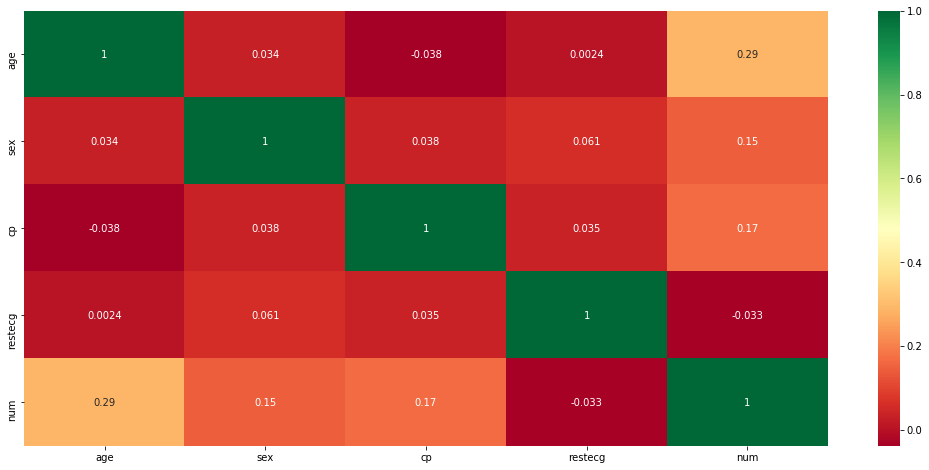

In [7]:
#checking correlation
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

here restecg is negatively correlated with num

In [8]:
#replacing the values 1,2,3,4 in num to  1  to detect heart disease presence
df['num'].replace(to_replace=[1,2,3,4],value="1",inplace=True)

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,0,0,1
1,44,1,4,130,209,0,1,127,0,0,0,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,3,0,0,1
3,55,1,4,142,228,0,1,149,1,2.5,1,0,0,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,0,0


In [10]:
df['chol']=df['chol'].astype(int)
df['fbs']=df['fbs'].astype(int)
df['trestbps']=df['trestbps'].astype(int)
df['thalach']=df['thalach'].astype(int)
df['exang']=df['exang'].astype(int)
df['oldpeak']=df['oldpeak'].astype(float)
df['slope']=df['slope'].astype(int)
df['thal']=df['thal'].astype(int)
df['ca']=df['ca'].astype(int)
df['num']=df['num'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  200 non-null    int32  
 4   chol      200 non-null    int32  
 5   fbs       200 non-null    int32  
 6   restecg   200 non-null    int64  
 7   thalach   200 non-null    int32  
 8   exang     200 non-null    int32  
 9   oldpeak   200 non-null    float64
 10  slope     200 non-null    int32  
 11  ca        200 non-null    int32  
 12  thal      200 non-null    int32  
 13  num       200 non-null    int32  
dtypes: float64(1), int32(9), int64(4)
memory usage: 15.0 KB


In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.0,200.000000,200.000000
mean,59.350000,0.970000,3.505000,96.310000,172.490000,0.340000,0.735000,90.25500,0.475000,0.951000,1.045000,0.0,1.070000,0.745000
std,7.811697,0.171015,0.795701,62.917781,116.752497,0.474898,0.683455,57.50237,0.500628,1.110344,1.166093,0.0,2.427874,0.436955
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-0.500000,0.000000,0.0,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,60.000000,1.000000,4.000000,123.000000,214.000000,0.000000,1.000000,111.50000,0.000000,0.500000,0.000000,0.0,0.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.00000,1.000000,2.000000,2.000000,0.0,0.000000,1.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.00000,1.000000,4.000000,3.000000,0.0,7.000000,1.000000


In [13]:
print(df.groupby('num').size())

num
0     51
1    149
dtype: int64


In [14]:
print(df.groupby('sex').size())   #1-male,0-female

sex
0      6
1    194
dtype: int64


In [15]:
#checking skewness
df.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -0.750363
chol       -0.469975
fbs         0.680636
restecg     0.391463
thalach    -0.715818
exang       0.100883
oldpeak     0.823429
slope       0.468819
ca          0.000000
thal        1.905183
num        -1.132724
dtype: float64

most of the data value is less than 0.55 

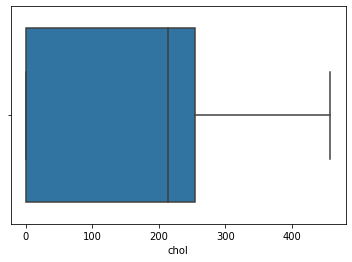

In [16]:
#checking outliers
sns.boxplot(df['chol'])

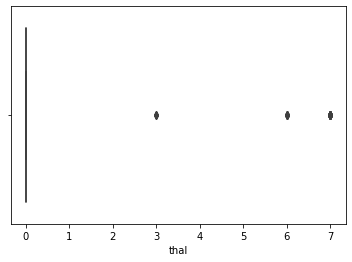

In [17]:
sns.boxplot(df['thal'])

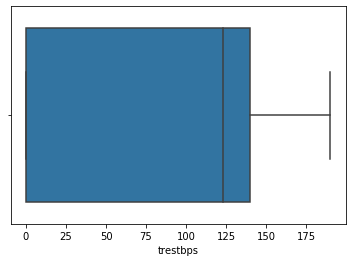

In [18]:
sns.boxplot(df['trestbps'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000028B1AD1FC8>,
      dtype=object)

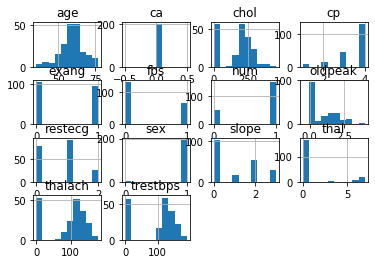

In [19]:
df.hist()

from above we can say ranges are different for different columns so there is a need of scaling

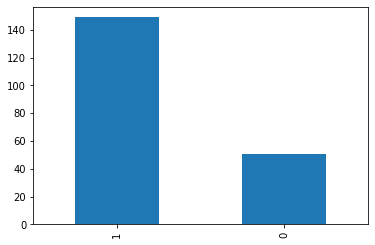

In [20]:
#EDA
df.num.value_counts().plot(kind="bar")

maximum people are having heart disease

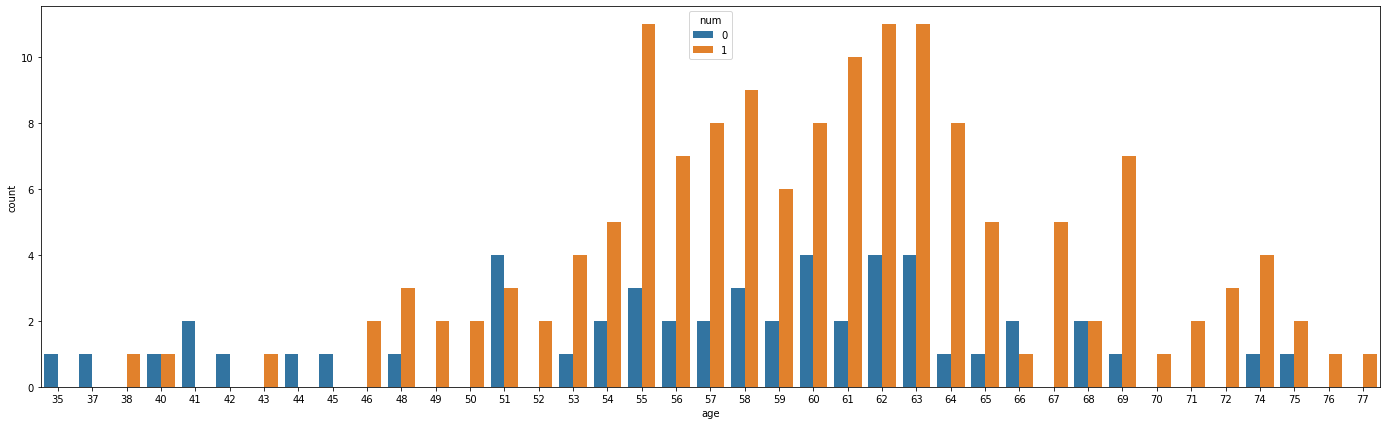

In [21]:
plt.figure(figsize=(24,7))
sns.countplot(x='age',data=df,hue='num')

from the age group of 54 to 64 ...heart disease is occuring more

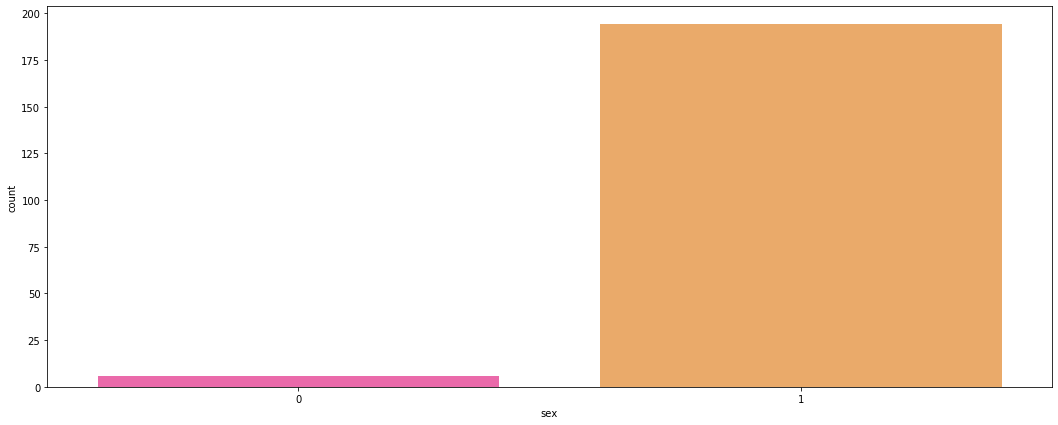

In [22]:
plt.figure(figsize=(18,7))
sns.countplot('sex',data=df,palette='spring')

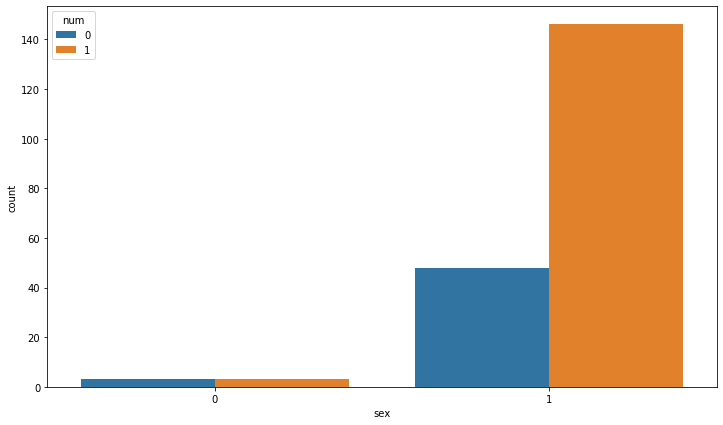

In [23]:
plt.figure(figsize=(12,7))
sns.countplot(x='sex',data=df,hue='num')

In females heart disease chances are 50-50 but in males heart disease occuring is more

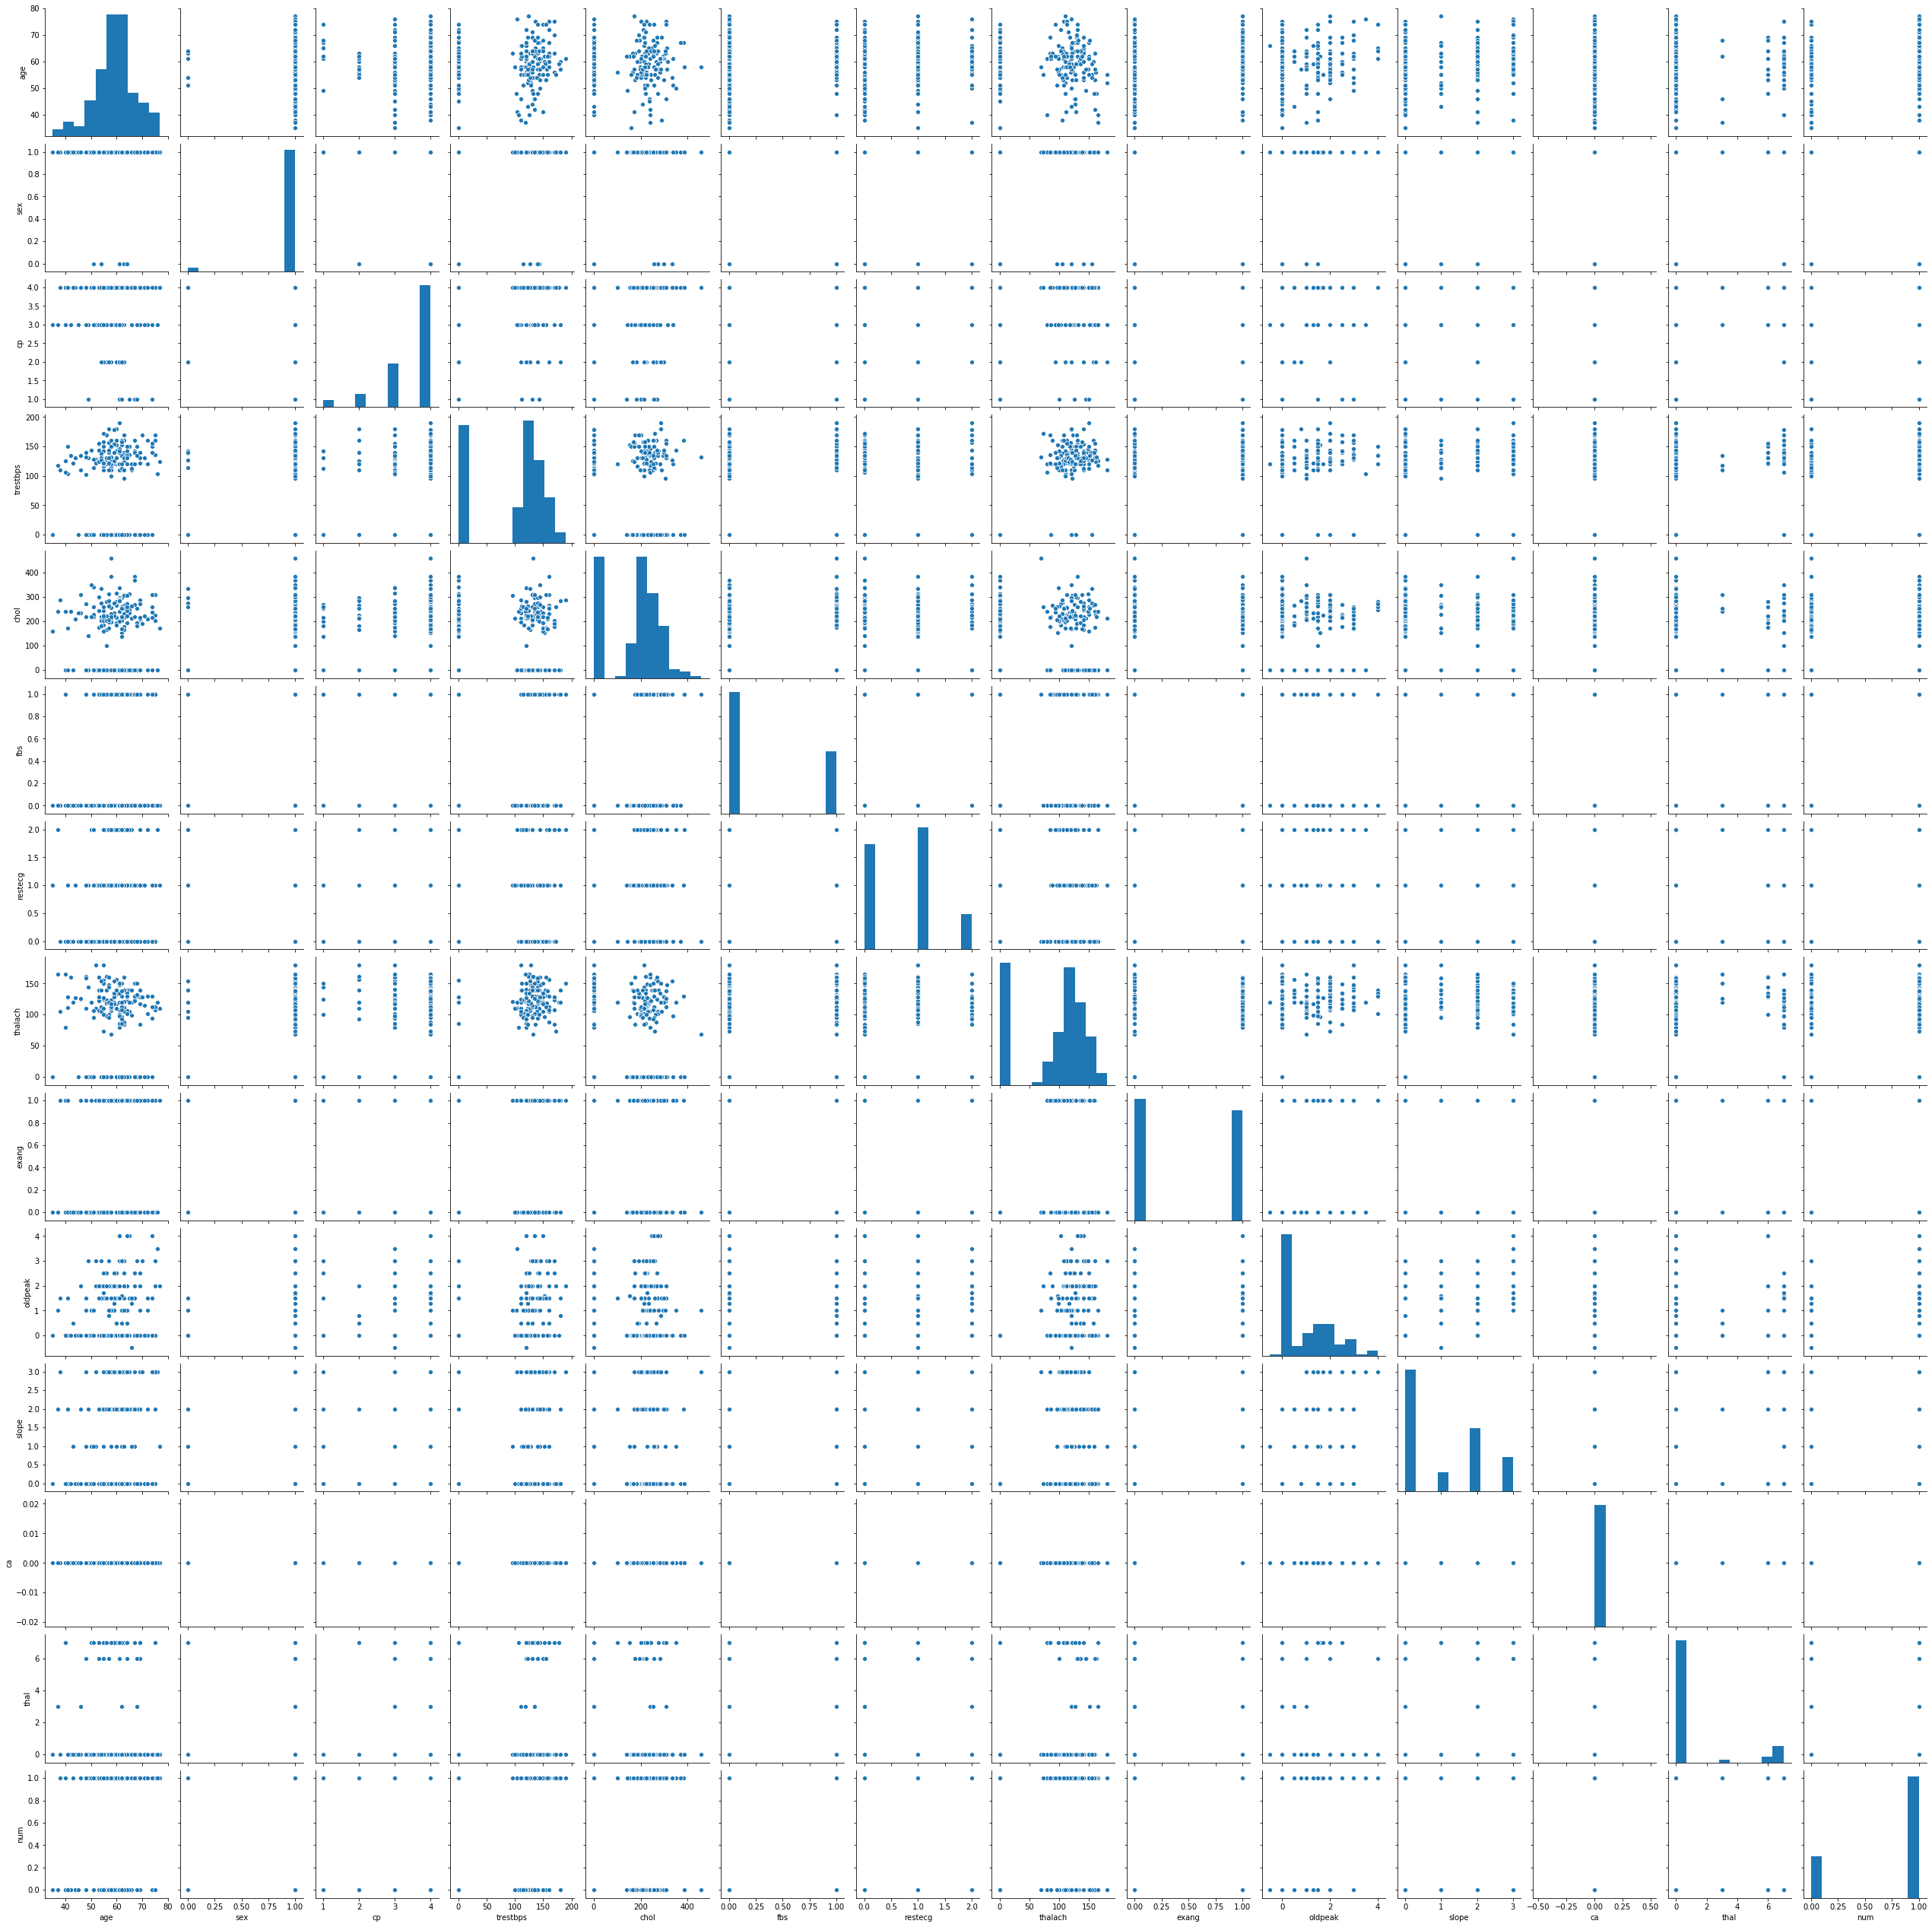

In [24]:
sns.pairplot(df)

In [25]:
#treating skewness via log method
for col in df.columns:
    if df[col].skew()>0.55:
        df[col]=np.log1p(df[col])
df.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -0.750363
chol       -0.469975
fbs         0.680636
restecg     0.391463
thalach    -0.715818
exang       0.100883
oldpeak     0.314899
slope       0.468819
ca          0.000000
thal        1.819829
num        -1.132724
dtype: float64

In [26]:
# Model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler


In [27]:
#lets split into input and target variables
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [28]:
#splitting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=39)

In [29]:
#scaling the data
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [30]:
#Logistic regression
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
print('Accuracy score',accuracy_score(y_test,y_pred))
print('confusion_matrix',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))

Accuracy score 0.725
confusion_matrix [[ 3 10]
 [ 1 26]]
classification_report               precision    recall  f1-score   support

           0       0.75      0.23      0.35        13
           1       0.72      0.96      0.83        27

    accuracy                           0.73        40
   macro avg       0.74      0.60      0.59        40
weighted avg       0.73      0.72      0.67        40



In [31]:
#cross validation
from sklearn.model_selection import cross_val_score
lgscores=cross_val_score(lg,x,y,cv=5)
print(lgscores)
print(lgscores.mean())

[0.8   0.75  0.75  0.825 0.65 ]
0.755


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
model=[LogisticRegression(), GaussianNB(),SVC(), DecisionTreeClassifier(),KNeighborsClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
0.725
[[ 3 10]
 [ 1 26]]
              precision    recall  f1-score   support

           0       0.75      0.23      0.35        13
           1       0.72      0.96      0.83        27

    accuracy                           0.73        40
   macro avg       0.74      0.60      0.59        40
weighted avg       0.73      0.72      0.67        40



accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
0.8
[[ 8  5]
 [ 3 24]]
              precision    recall  f1-score   support

           0       0.73      0.62      0.67        13
           1       0.83      0.89      0.86        27

    accuracy                           0.80 

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=99)
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print('accuracy score:',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy score: 0.85
[[ 5  5]
 [ 1 29]]
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.85      0.97      0.91        30

    accuracy                           0.85        40
   macro avg       0.84      0.73      0.77        40
weighted avg       0.85      0.85      0.84        40



In [34]:
from sklearn.model_selection import cross_val_score
rfscores=cross_val_score(rfc,x,y,cv=10)
print(rfscores)
print(rfscores.mean())


[0.8  0.65 0.9  0.9  0.7  0.7  0.65 0.8  0.8  0.65]
0.755


In [35]:
#hyper parameters
import numpy as np
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#no. of feature consider at every split
max_features=['auto','sqrt']
# max. no. of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#max_depth.append(None)
#Minimum no. of samples required to split a node
min_sample_split=[2,5,10,15,100]
#minimum no. of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [36]:
# create the random grid
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_sample_split,
             'min_samples_leaf':min_samples_leaf
              }

In [37]:
rf_random=RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,scoring='accuracy',n_iter=10,cv=10,verbose=2,random_state=42,n_jobs=1)

In [38]:
rf_random

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [39]:
rf_random.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.0s
[CV] n_estimators=900, min_samples_split=5, min_samp

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.9min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [40]:
predictions=rf_random.predict(x_test)

In [41]:
rf_random.best_score_

0.75

In [42]:
from sklearn.model_selection import cross_val_score
rfscores=cross_val_score(GaussianNB(),x,y,cv=2)
print(rfscores)
print(rfscores.mean())


[0.72 0.64]
0.6799999999999999


among all models random forest and GaussianNB is giving high score but cross validation score is better with random forest.so, lets save random forest model 

In [43]:
#saving a model
from sklearn.externals import joblib
joblib.dump(rfc,'heartdisease.pkl')

['heartdisease.pkl']

In [44]:
df1=pd.DataFrame(y_pred)
df1.to_csv("heart_disease.csv")